<a href="https://colab.research.google.com/github/DhrubaAdhikary/Learn_CV_with_Dhruv/blob/master/calculator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import convolve2d
from tabulate import tabulate

# 5x5 sample grayscale image
img = np.array([
    [100, 100, 100, 100, 100],
    [100, 100, 100, 100, 100],
    [100, 100, 150, 180, 180],
    [100, 100, 180, 220, 255],
    [100, 100, 180, 255, 255],
], dtype=np.float32)


In [14]:
sobel_x = np.array([[-1, 0, 1],
                    [-2, 0, 2],
                    [-1, 0, 1]])

sobel_y = np.array([[-1, -2, -1],
                    [ 0,  0,  0],
                    [ 1,  2,  1]])


In [15]:
import numpy as np
import pandas as pd
from scipy.signal import convolve2d
from tabulate import tabulate

# 1. Input 5x5 image

# 5x5 sample grayscale image
img = np.array([
    [100, 100, 100, 100, 100],
    [100, 100, 100, 100, 100],
    [100, 100, 150, 180, 180],
    [100, 100, 180, 220, 255],
    [100, 100, 180, 255, 255],
], dtype=np.float32)


# 2. Sobel kernels
sobel_x = np.array([[-1, 0, 1],
                    [-2, 0, 2],
                    [-1, 0, 1]])
sobel_y = np.array([[-1, -2, -1],
                    [ 0,  0,  0],
                    [ 1,  2,  1]])

# 3. Convolutions
Ix = convolve2d(img, sobel_x, mode='same', boundary='symm')
Iy = convolve2d(img, sobel_y, mode='same', boundary='symm')
Ix2 = Ix ** 2
Iy2 = Iy ** 2
Ixy = Ix * Iy

# 4. Build results table
rows = []
for i in range(1, 4):
    for j in range(1, 4):
        patch = img[i-1:i+2, j-1:j+2]
        mult_x = patch * sobel_x
        mult_y = patch * sobel_y
        ix_val = Ix[i, j]
        iy_val = Iy[i, j]
        ixiy = ix_val * iy_val
        rows.append({
            "Point": f"({i},{j})",
            "Patch": str(patch.astype(int).tolist()),
            "Sobel_X Elementwise": str(mult_x.tolist()),
            "Sobel_Y Elementwise": str(mult_y.tolist()),
            "Ix": ix_val,
            "Iy": iy_val,
            "Ix*Iy": ixiy
        })


df = pd.DataFrame(rows)

# 5. Display table
print(tabulate(df, headers='keys', tablefmt='grid', showindex=False))


+---------+-----------------------------------------------------+--------------------------------------------------------------------+--------------------------------------------------------------------+------+------+---------+
| Point   | Patch                                               | Sobel_X Elementwise                                                | Sobel_Y Elementwise                                                |   Ix |   Iy |   Ix*Iy |
+=========+=====================================================+====================================================================+====================================================================+======+======+=========+
| (1,1)   | [[100, 100, 100], [100, 100, 100], [100, 100, 150]] | [[-100.0, 0.0, 100.0], [-200.0, 0.0, 200.0], [-100.0, 0.0, 150.0]] | [[-100.0, -200.0, -100.0], [0.0, 0.0, 0.0], [100.0, 200.0, 150.0]] |  -50 |  -50 |    2500 |
+---------+-----------------------------------------------------+-----------------------

In [16]:
Ix,Iy,Ixy

(array([[   0.,    0.,    0.,    0.,    0.],
        [   0.,  -50.,  -80.,  -30.,    0.],
        [   0., -180., -280., -135.,  -35.],
        [   0., -290., -475., -255.,  -70.],
        [   0., -320., -585., -300.,  -35.]]),
 array([[   0.,    0.,    0.,    0.,    0.],
        [   0.,  -50., -180., -290., -320.],
        [   0.,  -80., -280., -475., -585.],
        [   0.,  -30., -135., -255., -300.],
        [   0.,    0.,  -35.,  -70.,  -35.]]),
 array([[    0.,     0.,     0.,     0.,     0.],
        [    0.,  2500., 14400.,  8700.,    -0.],
        [    0., 14400., 78400., 64125., 20475.],
        [    0.,  8700., 64125., 65025., 21000.],
        [    0.,    -0., 20475., 21000.,  1225.]]))

In [17]:
Ix2,Iy2

(array([[     0.,      0.,      0.,      0.,      0.],
        [     0.,   2500.,   6400.,    900.,      0.],
        [     0.,  32400.,  78400.,  18225.,   1225.],
        [     0.,  84100., 225625.,  65025.,   4900.],
        [     0., 102400., 342225.,  90000.,   1225.]]),
 array([[     0.,      0.,      0.,      0.,      0.],
        [     0.,   2500.,  32400.,  84100., 102400.],
        [     0.,   6400.,  78400., 225625., 342225.],
        [     0.,    900.,  18225.,  65025.,  90000.],
        [     0.,      0.,   1225.,   4900.,   1225.]]))

In [18]:
gaussian_kernel = (1/16) * np.array([[1, 2, 1],
                                     [2, 4, 2],
                                     [1, 2, 1]])

# Step 5: Smooth gradient products
Sxx = convolve2d(Ix2, gaussian_kernel, mode='same', boundary='symm')
Syy = convolve2d(Iy2, gaussian_kernel, mode='same', boundary='symm')
Sxy = convolve2d(Ixy, gaussian_kernel, mode='same', boundary='symm')

# Step 6: Build table for center 3x3 points
rows = []
for i in range(1, 4):
    for j in range(1, 4):
        patch_Ix2 = Ix2[i-1:i+2, j-1:j+2]
        patch_Iy2 = Iy2[i-1:i+2, j-1:j+2]
        patch_Ixy = Ixy[i-1:i+2, j-1:j+2]
        rows.append({
            "Point": f"({i},{j})",
            "Ix² Patch": str(np.round(patch_Ix2, 1).tolist()),
            "Iy² Patch": str(np.round(patch_Iy2, 1).tolist()),
            "Ix·Iy Patch": str(np.round(patch_Ixy, 1).tolist()),
            "Sxx": np.round(Sxx[i, j], 2),
            "Syy": np.round(Syy[i, j], 2),
            "Sxy": np.round(Sxy[i, j], 2)
        })

# Step 7: Display
df = pd.DataFrame(rows)
print(tabulate(df, headers='keys', tablefmt='grid', showindex=False))



+---------+--------------------------------------------------------------------------------------------+--------------------------------------------------------------------------------------------+----------------------------------------------------------------------------------------+-----------+-----------+---------+
| Point   | Ix² Patch                                                                                  | Iy² Patch                                                                                  | Ix·Iy Patch                                                                            |       Sxx |       Syy |     Sxy |
+=========+============================================================================================+============================================================================================+========================================================================================+===========+===========+=========+
| (1,1)   | [[0.0, 0.0, 0.0], [0.0, 2

In [20]:
k = 0.04  # Harris constant

for row in rows:
    Sxx_val = row["Sxx"]
    Syy_val = row["Syy"]
    Sxy_val = row["Sxy"]

    det_M = Sxx_val * Syy_val - Sxy_val ** 2
    trace_M = Sxx_val + Syy_val
    R = det_M - k * (trace_M ** 2)
    row["R"] = np.round(R, 2)

# Convert to DataFrame again to include R
df_r = pd.DataFrame(rows)

# Display R score
from tabulate import tabulate
print(tabulate(df_r[["Point", "Sxx", "Syy", "Sxy", "R"]], headers='keys', tablefmt='grid', showindex=False))


+---------+-----------+-----------+---------+-------------+
| Point   |       Sxx |       Syy |     Sxy |           R |
+=========+===========+===========+=========+=============+
| (1,1)   |  10375    |  10375    |  9125   | 7.1525e+06  |
+---------+-----------+-----------+---------+-------------+
| (1,2)   |  14989.1  |  43226.6  | 19707.8 | 1.23965e+08 |
+---------+-----------+-----------+---------+-------------+
| (1,3)   |   8279.69 |  92367.2  | 18170.3 | 2.94198e+07 |
+---------+-----------+-----------+---------+-------------+
| (2,1)   |  43226.6  |  14989.1  | 19707.8 | 1.23965e+08 |
+---------+-----------+-----------+---------+-------------+
| (2,2)   |  64464.1  |  64464.1  | 44539.1 | 1.50699e+09 |
+---------+-----------+-----------+---------+-------------+
| (2,3)   |  37557.8  | 142814    | 43826.6 | 2.14166e+09 |
+---------+-----------+-----------+---------+-------------+
| (3,1)   |  92367.2  |   8279.69 | 18170.3 | 2.94198e+07 |
+---------+-----------+-----------+-----

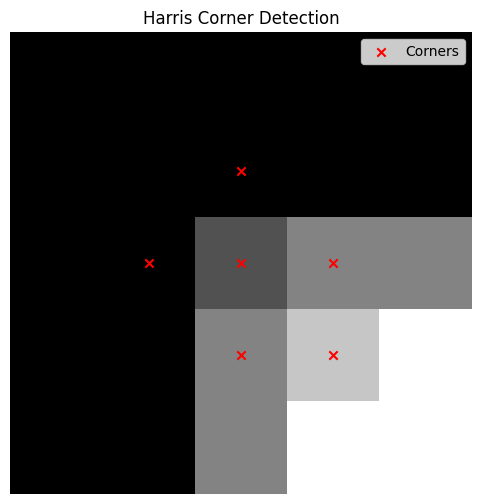

In [21]:
import matplotlib.pyplot as plt

# Step 1: Allocate full R-map
H = np.zeros_like(img)

# Step 2: Fill Harris R values in valid region
for i in range(1, 4):
    for j in range(1, 4):
        Sxx_val = Sxx[i, j]
        Syy_val = Syy[i, j]
        Sxy_val = Sxy[i, j]
        det_M = Sxx_val * Syy_val - Sxy_val ** 2
        trace_M = Sxx_val + Syy_val
        R = det_M - k * (trace_M ** 2)
        H[i, j] = R

# Step 3: Threshold (you can adjust this)
threshold = np.max(H) * 0.01
corners = (H > threshold)

# Step 4: Plot
plt.figure(figsize=(6, 6))
plt.imshow(img, cmap='gray')
ys, xs = np.where(corners)
plt.scatter(xs, ys, c='red', marker='x', label='Corners')
plt.title("Harris Corner Detection")
plt.legend()
plt.grid(False)
plt.axis('off')
plt.show()


In [22]:
from ipywidgets import interact, FloatSlider

def show_corners(threshold_ratio=0.01):
    threshold = np.max(H) * threshold_ratio
    corners = (H > threshold)

    plt.figure(figsize=(6, 6))
    plt.imshow(img, cmap='gray')
    ys, xs = np.where(corners)
    plt.scatter(xs, ys, c='red', marker='x', label='Corners')
    plt.title(f"Harris Corners (Threshold: {threshold_ratio:.4f})")
    plt.legend()
    plt.axis('off')
    plt.grid(False)
    plt.show()

interact(show_corners, threshold_ratio=FloatSlider(value=0.01, min=0.0001, max=0.1, step=0.001))


interactive(children=(FloatSlider(value=0.01, description='threshold_ratio', max=0.1, min=0.0001, step=0.001),…

<function __main__.show_corners(threshold_ratio=0.01)>

# HOG Calculator

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from skimage import feature
from skimage.color import rgb2gray
from skimage import data

# Create a simple synthetic 2D image
image = np.array([
    [100, 100, 100, 100, 100],
    [100, 150, 150, 150, 100],
    [100, 150, 200, 150, 100],
    [100, 150, 150, 150, 100],
    [100, 100, 100, 100, 100]
], dtype=np.float32)

# Compute gradients using Sobel operator
sobel_x = np.array([[ -1, 0, 1],
                    [ -2, 0, 2],
                    [ -1, 0, 1]])

sobel_y = np.array([[ -1, -2, -1],
                    [  0,  0,  0],
                    [  1,  2,  1]])

def compute_gradients(img):
    gx = np.zeros_like(img)
    gy = np.zeros_like(img)
    for i in range(1, img.shape[0] - 1):
        for j in range(1, img.shape[1] - 1):
            patch = img[i - 1:i + 2, j - 1:j + 2]
            gx[i, j] = np.sum(patch * sobel_x)
            gy[i, j] = np.sum(patch * sobel_y)
    return gx, gy

gx, gy = compute_gradients(image)
magnitude = np.sqrt(gx**2 + gy**2)
orientation = np.rad2deg(np.arctan2(gy, gx)) % 180

# Create a DataFrame to display gradients and orientation
data = []
for i in range(image.shape[0]):
    for j in range(image.shape[1]):
        data.append({
            'Pixel': f'({i},{j})',
            'Gradient X': gx[i, j],
            'Gradient Y': gy[i, j],
            'Magnitude': magnitude[i, j],
            'Orientation (deg)': orientation[i, j]
        })

df = pd.DataFrame(data)
df


,Pixel,Gradient X,Gradient Y,Magnitude,Orientation (deg)
0,"(0,0)",0.0,0.0,0.000000,0.0
1,"(0,1)",0.0,0.0,0.000000,0.0
2,"(0,2)",0.0,0.0,0.000000,0.0
3,"(0,3)",0.0,0.0,0.000000,0.0
4,"(0,4)",0.0,0.0,0.000000,0.0
5,"(1,0)",0.0,0.0,0.000000,0.0
6,"(1,1)",200.0,200.0,282.842712,45.0
7,"(1,2)",0.0,300.0,300.000000,90.0
8,"(1,3)",-200.0,200.0,282.842712,135.0
9,"(1,4)",0.0,0.0,0.000000,0.0


In [24]:
# Define HOG binning
num_bins = 9
bin_size = 180 // num_bins
bin_edges = np.arange(0, 181, bin_size)

# Function to compute histogram contribution using bilinear interpolation
def compute_hog_bins(mag, ori):
    hist = np.zeros(num_bins)
    for m, o in zip(mag.flatten(), ori.flatten()):
        if m == 0:
            continue
        # Find bin indices
        bin_idx = int(o // bin_size)
        bin_center = bin_idx * bin_size + bin_size / 2

        # Calculate contribution for current and adjacent bin
        diff = o - bin_center
        if diff >= 0:
            right_bin = (bin_idx + 1) % num_bins
            left_bin = bin_idx
            right_contrib = (diff / bin_size) * m
            left_contrib = m - right_contrib
        else:
            left_bin = (bin_idx - 1 + num_bins) % num_bins
            right_bin = bin_idx
            left_contrib = (-diff / bin_size) * m
            right_contrib = m - left_contrib

        hist[left_bin] += left_contrib
        hist[right_bin] += right_contrib

    return hist

# Compute histogram for the full image
hog_hist = compute_hog_bins(magnitude[1:-1,1:-1], orientation[1:-1,1:-1])

# Create a DataFrame to show the histogram bin contributions
bin_labels = [f"{bin_edges[i]}-{bin_edges[i+1]}°" for i in range(num_bins)]
hog_df = pd.DataFrame({
    "Orientation Bin": bin_labels,
    "Bilinear Contribution": hog_hist
})
hog_df


,Orientation Bin,Bilinear Contribution
0,0-20°,300.000000
1,20-40°,141.421356
2,40-60°,424.264069
3,60-80°,0.000000
4,80-100°,600.000000
5,100-120°,0.000000
6,120-140°,424.264069
7,140-160°,141.421356
8,160-180°,300.000000


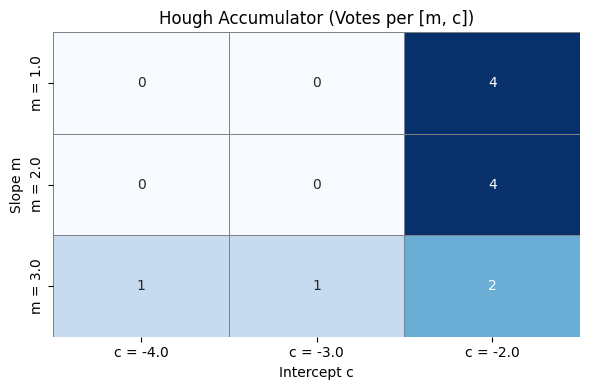

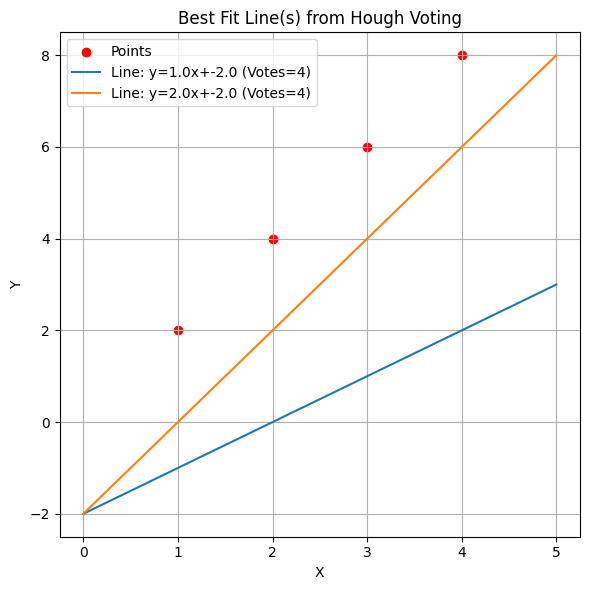

✅ All points lie on the same line.


,Point,Slope m,Computed c = y - mx,Nearest Fixed c,Accumulator Index
0,"(1,2)",1.0,1.0,-2.0,"[0,2]"
1,"(1,2)",2.0,0.0,-2.0,"[1,2]"
2,"(1,2)",3.0,-1.0,-2.0,"[2,2]"
3,"(2,4)",1.0,2.0,-2.0,"[0,2]"
4,"(2,4)",2.0,0.0,-2.0,"[1,2]"
5,"(2,4)",3.0,-2.0,-2.0,"[2,2]"
6,"(3,6)",1.0,3.0,-2.0,"[0,2]"
7,"(3,6)",2.0,0.0,-2.0,"[1,2]"
8,"(3,6)",3.0,-3.0,-3.0,"[2,1]"
9,"(4,8)",1.0,4.0,-2.0,"[0,2]"


In [25]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# ------------------------------
# Step 1: Define the 4 points
# ------------------------------
points = np.array([
    [1, 2],
    [2, 4],
    [3, 6],
    [4, 8]
])

# ------------------------------
# Step 2: Fixed slope values (user-defined, exactly 3)
# ------------------------------
fixed_m_values = np.array([1.0, 2.0, 3.0])  # User-defined slopes

# ------------------------------
# Step 3: Compute all c values for each point and slope
# ------------------------------
computed_cs = []
for m in fixed_m_values:
    for (x, y) in points:
        c = y - m * x
        computed_cs.append(c)

# Discretize c using the unique values from computed results
unique_c_values = np.unique(np.round(computed_cs, 2))
if len(unique_c_values) < 3:
    # Pad with neighbors if fewer than 3 unique
    pad = 3 - len(unique_c_values)
    extra_c = np.linspace(unique_c_values.min() - 1, unique_c_values.max() + 1, pad)
    fixed_c_values = np.unique(np.round(np.concatenate((unique_c_values, extra_c)), 2))
else:
    fixed_c_values = np.sort(unique_c_values)[:3]

# ------------------------------
# Step 4: Initialize accumulator and vote logs
# ------------------------------
accumulator = np.zeros((len(fixed_m_values), len(fixed_c_values)), dtype=int)
vote_logs = []

for (x, y) in points:
    for i, m in enumerate(fixed_m_values):
        c = y - m * x
        j = np.argmin(np.abs(fixed_c_values - c))
        accumulator[i, j] += 1
        vote_logs.append({
            "Point": f"({x},{y})",
            "Slope m": m,
            "Computed c = y - mx": round(c, 4),
            "Nearest Fixed c": fixed_c_values[j],
            "Accumulator Index": f"[{i},{j}]"
        })

votes_df = pd.DataFrame(vote_logs)

# ------------------------------
# Step 5: Identify the best (m, c) with highest votes
# ------------------------------
max_votes = accumulator.max()
max_indices = np.argwhere(accumulator == max_votes)

best_lines = []
for i, j in max_indices:
    best_lines.append({
        "Best Slope m": fixed_m_values[i],
        "Best Intercept c": fixed_c_values[j],
        "Votes": accumulator[i, j]
    })
best_lines_df = pd.DataFrame(best_lines)

# ------------------------------
# Step 6: Visualize accumulator
# Show raw accumulator voting values as matrix
# ------------------------------
import seaborn as sns

# Create labeled DataFrame for accumulator matrix
accumulator_df = pd.DataFrame(
    accumulator,
    index=[f"m = {m}" for m in fixed_m_values],
    columns=[f"c = {c}" for c in fixed_c_values]
)

# Plot values in each cell
plt.figure(figsize=(6, 4))
sns.heatmap(accumulator_df, annot=True, fmt="d", cmap="Blues", cbar=False,
            linewidths=0.5, linecolor='gray')
plt.title("Hough Accumulator (Votes per [m, c])")
plt.xlabel("Intercept c")
plt.ylabel("Slope m")
plt.tight_layout()
plt.show()


# ------------------------------
# Step 7: Plot points and best line(s)
# ------------------------------
plt.figure(figsize=(6, 6))
x_vals = np.linspace(0, 5, 100)
plt.scatter(points[:, 0], points[:, 1], color='red', label="Points")

for line in best_lines:
    m, c = line["Best Slope m"], line["Best Intercept c"]
    y_vals = m * x_vals + c
    plt.plot(x_vals, y_vals, label=f"Line: y={m}x+{c} (Votes={line['Votes']})")

plt.title("Best Fit Line(s) from Hough Voting")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# ------------------------------
# Step 8: Final Inference
# ------------------------------
all_points_on_line = any(line["Votes"] == len(points) for line in best_lines)

if all_points_on_line:
    print("✅ All points lie on the same line.")
else:
    print("❌ Points do not all lie on the same line.")

# Display tables
votes_df


In [26]:
# Now in polar co ordinates

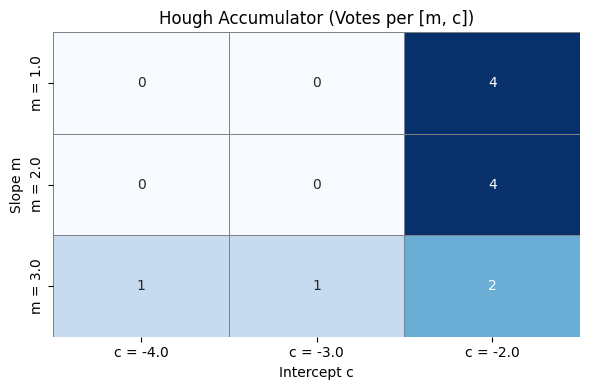

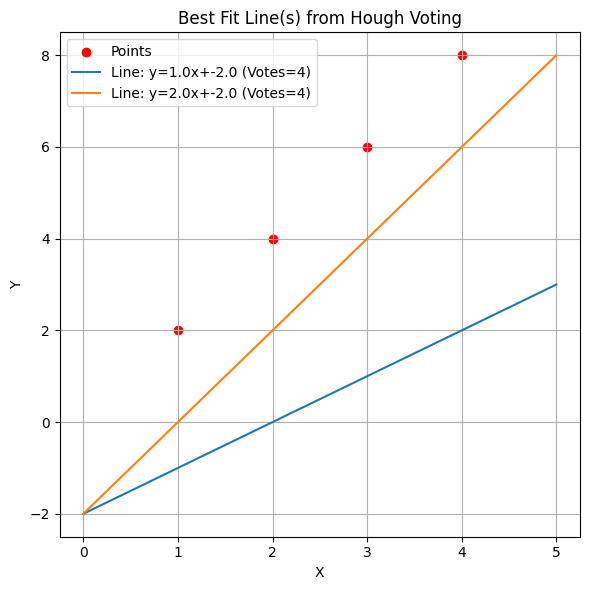

✅ All points lie on the same line.


,Theta (deg),Rho,Original m,Original c,Votes
0,45.00,-1.4142,1.0,-2.0,4
1,63.43,-1.7889,2.0,-2.0,4


In [27]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# ------------------------------
# Step 1: Define the 4 points
# ------------------------------
points = np.array([
    [1, 2],
    [2, 4],
    [3, 6],
    [4, 8]
])

# ------------------------------
# Step 2: Fixed slope values (user-defined, exactly 3)
# ------------------------------
fixed_m_values = np.array([1.0, 2.0, 3.0])  # User-defined slopes

# ------------------------------
# Step 3: Compute all c values for each point and slope
# ------------------------------
computed_cs = []
for m in fixed_m_values:
    for (x, y) in points:
        c = y - m * x
        computed_cs.append(c)

# Discretize c using the unique values from computed results
unique_c_values = np.unique(np.round(computed_cs, 2))
if len(unique_c_values) < 3:
    pad = 3 - len(unique_c_values)
    extra_c = np.linspace(unique_c_values.min() - 1, unique_c_values.max() + 1, pad)
    fixed_c_values = np.unique(np.round(np.concatenate((unique_c_values, extra_c)), 2))
else:
    fixed_c_values = np.sort(unique_c_values)[:3]

# ------------------------------
# Step 4: Initialize accumulator and vote logs
# ------------------------------
accumulator = np.zeros((len(fixed_m_values), len(fixed_c_values)), dtype=int)
vote_logs = []

for (x, y) in points:
    for i, m in enumerate(fixed_m_values):
        c = y - m * x
        j = np.argmin(np.abs(fixed_c_values - c))
        accumulator[i, j] += 1
        vote_logs.append({
            "Point": f"({x},{y})",
            "Slope m": m,
            "Computed c = y - mx": round(c, 4),
            "Nearest Fixed c": fixed_c_values[j],
            "Accumulator Index": f"[{i},{j}]"
        })

votes_df = pd.DataFrame(vote_logs)

# ------------------------------
# Step 5: Identify the best (m, c) with highest votes
# ------------------------------
max_votes = accumulator.max()
max_indices = np.argwhere(accumulator == max_votes)

best_lines = []
for i, j in max_indices:
    best_lines.append({
        "Best Slope m": fixed_m_values[i],
        "Best Intercept c": fixed_c_values[j],
        "Votes": accumulator[i, j]
    })

# ------------------------------
# Step 6: Convert (m, c) to polar (ρ, θ)
# ------------------------------
polar_lines = []
for line in best_lines:
    m, c = line["Best Slope m"], line["Best Intercept c"]
    theta = np.arctan(m)
    rho = c * np.sin(theta)
    polar_lines.append({
        "Theta (deg)": round(np.rad2deg(theta), 2),
        "Rho": round(rho, 4),
        "Original m": m,
        "Original c": c,
        "Votes": line["Votes"]
    })

polar_df = pd.DataFrame(polar_lines)

# ------------------------------
# Step 7: Visualize raw accumulator as numeric table
# ------------------------------
accumulator_df = pd.DataFrame(
    accumulator,
    index=[f"m = {m}" for m in fixed_m_values],
    columns=[f"c = {c}" for c in fixed_c_values]
)

plt.figure(figsize=(6, 4))
sns.heatmap(accumulator_df, annot=True, fmt="d", cmap="Blues", cbar=False,
            linewidths=0.5, linecolor='gray')
plt.title("Hough Accumulator (Votes per [m, c])")
plt.xlabel("Intercept c")
plt.ylabel("Slope m")
plt.tight_layout()
plt.show()

# ------------------------------
# Step 8: Plot best fit line(s) from parameter space
# ------------------------------
plt.figure(figsize=(6, 6))
x_vals = np.linspace(0, 5, 100)
plt.scatter(points[:, 0], points[:, 1], color='red', label="Points")

for line in best_lines:
    m, c = line["Best Slope m"], line["Best Intercept c"]
    y_vals = m * x_vals + c
    plt.plot(x_vals, y_vals, label=f"Line: y={m}x+{c} (Votes={line['Votes']})")

plt.title("Best Fit Line(s) from Hough Voting")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# ------------------------------
# Step 9: Final Inference
# ------------------------------
all_points_on_line = any(line["Votes"] == len(points) for line in best_lines)
if all_points_on_line:
    print("✅ All points lie on the same line.")
else:
    print("❌ Points do not all lie on the same line.")

# Display final polar conversion
polar_df


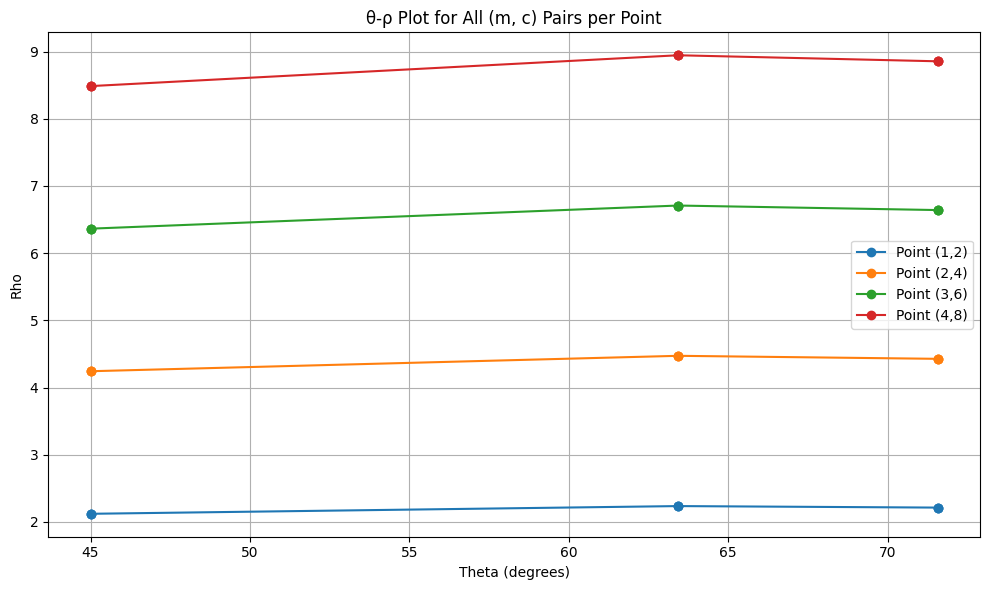

,Point,m,c,Theta (deg),Rho
0,"(1,2)",1.0,-4.0,45.00,2.1213
1,"(1,2)",1.0,-3.0,45.00,2.1213
2,"(1,2)",1.0,-2.0,45.00,2.1213
3,"(1,2)",2.0,-4.0,63.43,2.2361
4,"(1,2)",2.0,-3.0,63.43,2.2361
5,"(1,2)",2.0,-2.0,63.43,2.2361
6,"(1,2)",3.0,-4.0,71.57,2.2136
7,"(1,2)",3.0,-3.0,71.57,2.2136
8,"(1,2)",3.0,-2.0,71.57,2.2136
9,"(2,4)",1.0,-4.0,45.00,4.2426


In [28]:
# ------------------------------
# Step 10: Compute (theta, rho) from all (m, c) combinations for each point
# ------------------------------
theta_rho_records = []

for (x, y) in points:
    for m in fixed_m_values:
        for c in fixed_c_values:
            theta = np.arctan(m)
            rho = x * np.cos(theta) + y * np.sin(theta)
            theta_rho_records.append({
                "Point": f"({x},{y})",
                "m": m,
                "c": c,
                "Theta (deg)": round(np.rad2deg(theta), 2),
                "Rho": round(rho, 4)
            })

theta_rho_df = pd.DataFrame(theta_rho_records)

# ------------------------------
# Step 11: Plot (theta, rho) pairs for each point
# ------------------------------
plt.figure(figsize=(10, 6))
for point in np.unique(theta_rho_df["Point"]):
    df_point = theta_rho_df[theta_rho_df["Point"] == point]
    plt.plot(df_point["Theta (deg)"], df_point["Rho"], marker='o', label=f"Point {point}")

plt.title("θ-ρ Plot for All (m, c) Pairs per Point")
plt.xlabel("Theta (degrees)")
plt.ylabel("Rho")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Display (theta, rho) table
theta_rho_df


🔍 Why Parameter Space Shows Collinearity:
Your original code:

Tries only three slope values
𝑚
=
[
1
,
2
,
3
]
m=[1,2,3]

Votes for the nearest matching intercept
𝑐
=
𝑦
−
𝑚
𝑥
c=y−mx

Detects the line with the most votes, which correctly returns
𝑦
=
2
𝑥
y=2x (all 4 points lie exactly on this line)

✅ So yes, all points lie on a straight line in parameter space (classic Hough voting).

❌ Why You Don’t See It in Polar (θ, ρ) Space:
In your polar step:

You use all combinations of
(
𝑚
,
𝑐
)
(m,c) and compute:

𝜃
=
tan
⁡
−
1
(
𝑚
)
,
𝜌
=
𝑥
cos
⁡
𝜃
+
𝑦
sin
⁡
𝜃
θ=tan
−1
 (m),ρ=xcosθ+ysinθ
But these
(
𝑚
,
𝑐
)
(m,c) combinations include wrong lines, and you’re plotting all of them for each point.

That means you are not isolating the correct
(
𝑚
,
𝑐
)
(m,c) voted by Hough, but instead including wrong candidates, hence no clean intersection appears.



## However for your exams we will only ask for limited set of M and c values so your computation is limited . say 3 points only and the equivalent theta and rho values only

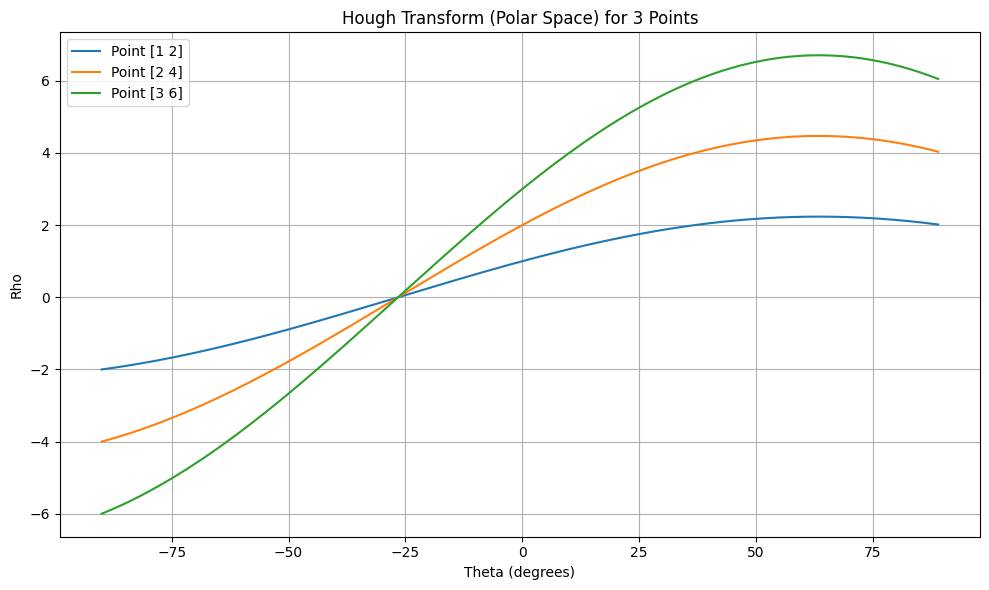

,Point,Theta (deg),Rho
0,"(1,2)",-90.0,-2.0000
1,"(1,2)",-89.0,-1.9822
2,"(1,2)",-88.0,-1.9639
3,"(1,2)",-87.0,-1.9449
4,"(1,2)",-86.0,-1.9254
5,"(1,2)",-85.0,-1.9052
6,"(1,2)",-84.0,-1.8845
7,"(1,2)",-83.0,-1.8632
8,"(1,2)",-82.0,-1.8414
9,"(1,2)",-81.0,-1.8189


In [30]:
# Actual Polar Implementation for all values of m and c
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# ----------------------------------------
# Step 1: Define 3 input points (you can change them)
# ----------------------------------------
points = np.array([
    [1, 2],
    [2, 4],
    [3, 6]
])

# ----------------------------------------
# Step 2: Define theta range in degrees
# ----------------------------------------
theta_degrees = np.linspace(-90, 89, 180)  # from -90 to +89.    say values of m and c gives me this .
theta_radians = np.deg2rad(theta_degrees)
cos_t = np.cos(theta_radians)
sin_t = np.sin(theta_radians)

# ----------------------------------------
# Step 3: For each point compute rho over all theta
# ----------------------------------------
rho_map = []
polar_table = []

for idx, (x, y) in enumerate(points):
    rho_values = x * cos_t + y * sin_t
    rho_map.append(rho_values)
    for theta_deg, rho in zip(theta_degrees, rho_values):
        polar_table.append({
            "Point": f"({x},{y})",
            "Theta (deg)": theta_deg,
            "Rho": round(rho, 4)
        })

# ----------------------------------------
# Step 4: Plot rho(θ) curves for all points
# ----------------------------------------
plt.figure(figsize=(10, 6))
for i, rho_vals in enumerate(rho_map):
    plt.plot(theta_degrees, rho_vals, label=f"Point {points[i]}")

plt.title("Hough Transform (Polar Space) for 3 Points")
plt.xlabel("Theta (degrees)")
plt.ylabel("Rho")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# ----------------------------------------
# Step 5: Show polar table (first 50 rows)
# ----------------------------------------
polar_df = pd.DataFrame(polar_table)
polar_df.head(50)
